# Classifying Movie Reviews

This notebook focuses on classifying users's movie reviews on Amazon, predicting their review scores based on their review text.

## Getting the data

#### Imports

We use a data structure I've created giving us a better and faster interface for extracting the dataset once, and then flexibly choosing users to predict upon.

In [1]:
from ReviewsData import *

#### Extracting user's reviews

Recall that the total number of reviews is 7,911,696.

We will take all the reviews of the first ```N_USERS``` users.

In [2]:
N_USERS = 20
review_data = ReviewData(FILE_PATH, max_users=N_USERS)

2020-09-12 19:11:36,414 - DEBUG - Starting population of 20 users's reviews from 7911684 reviews in file.
2020-09-12 19:16:27,723 - DEBUG - Populated data structure successfully.


## Preparing for train/test

#### Imports

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd

#### Converting to a DataFrame

In [5]:
users = review_data.get_users_list()
data = pd.DataFrame.from_records(review_data.get_user_reviews(users[0]))
data = data.drop(columns=['productId', 'userId', 'profileName', 'helpfulness', 'time', 'summary'])
data

2020-09-12 19:16:35,583 - DEBUG - Starting search for user reviews.
2020-09-12 19:16:35,584 - DEBUG - Returning user A141HP4LYPWMSR's  3649 reviews.


,score,text
0,3.0,"Synopsis: On the daily trek from Juarez, Mexic..."
1,4.0,The '02 release of `The Count of Monte Cristo'...
2,5.0,'The Doors' were one of the greatest rock and ...
3,5.0,Released in `64 `Mary Poppins' is without ques...
4,3.0,11 out of 12 reviewers (now 12 with mine) are ...
...,...,...
3644,5.0,`Earth' is the second film in Deepa Mehta's ci...
3645,5.0,What is it about this 1973 film dealing with t...
3646,5.0,"Carl Kolchak, the Night Stalker! Truly one of ..."
3647,3.0,Disney's 'Meet the Robinson' is a fast paced a...


#### Split train/test

In [6]:
X = data[['text']]
Y = data['score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Cleaning text

Removing punctuation & stopwords, tokenizing, and stemming.

In [18]:
import string
import re
import nltk

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [19]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Vectorize text

In NLP there are a few different ways of vectorizing the text, in preparation for modeling it.

We will use and compare:

1. The relative frequency of words in the reviews (TF-IDF).
2. The count of each word in each review (Bag-Of-Word / CountVectorizer)

#### TF-IDF

In [20]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(data['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_tfidf_train_vect = pd.DataFrame(tfidf_train.toarray())
X_tfidf_test_vect = pd.DataFrame(tfidf_test.toarray())

X_tfidf_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### CountVectorizer

In [21]:
count_vect = CountVectorizer(analyzer=clean_text)
X_counts_fit = count_vect.fit(data['text'])

X_count_train = X_counts_fit.transform(X_train['text'])
X_count_test = X_counts_fit.transform(X_test['text'])

X_BoW_train_vect = pd.DataFrame(X_count_train.toarray())
X_BoW_test_vect = pd.DataFrame(X_count_test.toarray())

X_BoW_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## The ML Classifier

#### Imports

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

We will use Random Forests.

In [23]:
def get_rf_model(X_train_vect, X_test_vect):
    rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
    rf_model = rf.fit(X_train_vect, y_train)
    y_pred = rf_model.predict(X_test_vect)

    precision, recall, fscore, train_support = score(y_test, y_pred, labels=[1.0, 2.0, 3.0, 4.0, 5.0], average=None)
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        precision, recall, fscore, acs(y_test,y_pred)))

    # Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    class_label = [1.0, 2.0, 3.0, 4.0, 5.0]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return rf_model

### TF-IDF

C:\Users\dantc\anaconda3\envs\snap_env\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
2020-09-12 19:21:52,764 - DEBUG - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FEC5AEE80>
2020-09-12 19:21:52,764 - DEBUG - Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FEC5AEE80> on colorbar
2020-09-12 19:21:52,764 - DEBUG - Setting pcolormesh


Precision: [1.         1.         0.98666667 0.9625     0.96428571] / Recall: [1.         0.96       0.94871795 0.9625     0.98671096] / F1-Score: [1.         0.97959184 0.96732026 0.9625     0.97536946] / Accuracy: 0.9698630136986301


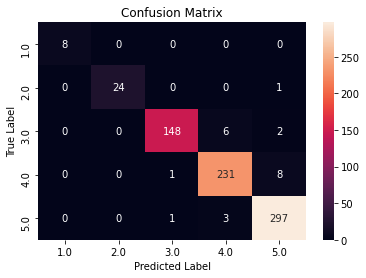

In [27]:
rf_model_tfidf = get_rf_model(X_tfidf_train_vect, X_tfidf_test_vect)

### CountVectorizer / BoW

C:\Users\dantc\anaconda3\envs\snap_env\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
2020-09-12 19:22:12,206 - DEBUG - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FEB57FF60>
2020-09-12 19:22:12,206 - DEBUG - Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FEB57FF60> on colorbar
2020-09-12 19:22:12,206 - DEBUG - Setting pcolormesh


Precision: [1.         1.         0.99328859 0.95102041 0.97368421] / Recall: [1.         0.96       0.94871795 0.97083333 0.9833887 ] / F1-Score: [1.         0.97959184 0.9704918  0.96082474 0.9785124 ] / Accuracy: 0.9712328767123287


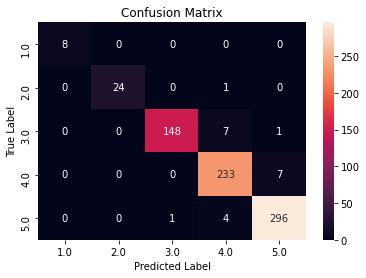

In [28]:
rf_model_BoW = get_rf_model(X_BoW_train_vect, X_BoW_test_vect)

## Classifying a different user for comparison

In [29]:
data = pd.DataFrame.from_records(review_data.get_user_reviews(users[1]))
data = data.drop(columns=['productId', 'userId', 'profileName', 'helpfulness', 'time', 'summary'])
data

2020-09-12 19:23:09,791 - DEBUG - Starting search for user reviews.
2020-09-12 19:23:09,792 - DEBUG - Returning user A328S9RN3U5M68's  7448 reviews.


,score,text
0,3.0,THE VIRGIN OF JUAREZ is based on true events s...
1,5.0,In this time of fire and explosion oriented bl...
2,5.0,THE LAST SAMURAI is for many of us a Sleeper o...
3,5.0,"Yes, Phillip Roth's gaudily angry masterwork o..."
4,5.0,THE HUMAN STAIN met a mixed reaction when rele...
...,...,...
7443,5.0,NOTE BY NOTE is a documentary that is not a do...
7444,3.0,"One wonders when Cuba Gooding, Jr is going to ..."
7445,4.0,Douglas Kennedy's perplexing novel THE WOMAN I...
7446,5.0,TELL NO ONE (Ne le dis &agrave; personne) succ...


In [30]:
X = data[['text']]
Y = data['score']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(data['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_tfidf_train_vect = pd.DataFrame(tfidf_train.toarray())
X_tfidf_test_vect = pd.DataFrame(tfidf_test.toarray())

# X_tfidf_train_vect.head()


count_vect = CountVectorizer(analyzer=clean_text)
X_counts_fit = count_vect.fit(data['text'])

X_count_train = X_counts_fit.transform(X_train['text'])
X_count_test = X_counts_fit.transform(X_test['text'])

X_BoW_train_vect = pd.DataFrame(X_count_train.toarray())
X_BoW_test_vect = pd.DataFrame(X_count_test.toarray())

# X_BoW_train_vect.head()

C:\Users\dantc\anaconda3\envs\snap_env\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
2020-09-12 19:28:17,088 - DEBUG - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FBE77B160>
2020-09-12 19:28:17,088 - DEBUG - Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FBE77B160> on colorbar
2020-09-12 19:28:17,088 - DEBUG - Setting pcolormesh


Precision: [1.         1.         0.9950495  0.91654466 0.95818182] / Recall: [1.         0.83333333 0.89732143 0.96456086 0.95126354] / F1-Score: [1.         0.90909091 0.94366197 0.93993994 0.95471014] / Accuracy: 0.9456375838926174


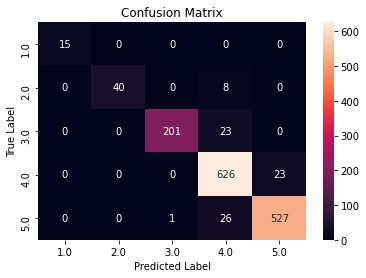

In [31]:
rf_model_tfidf = get_rf_model(X_tfidf_train_vect, X_tfidf_test_vect)

C:\Users\dantc\anaconda3\envs\snap_env\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
2020-09-12 19:28:41,861 - DEBUG - locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FBE7548D0>
2020-09-12 19:28:41,861 - DEBUG - Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000019FBE7548D0> on colorbar
2020-09-12 19:28:41,861 - DEBUG - Setting pcolormesh


Precision: [1.         1.         1.         0.92375367 0.96557971] / Recall: [1.         0.83333333 0.89732143 0.97072419 0.96209386] / F1-Score: [1.         0.90909091 0.94588235 0.94665665 0.96383363] / Accuracy: 0.9523489932885906


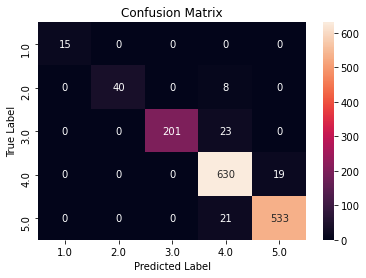

In [32]:
rf_model_BoW = get_rf_model(X_BoW_train_vect, X_BoW_test_vect)

## Conclusion

1. We can safely say that our classifiers work quite accurately, giving us confidence in the ways we've pre-processed our data, and the model we've chosen.
2. It seems like for this particular task, the TF-IDF & Bag-Of-Words vectorization techniques get the job done.
3. Data extraction for even 20 users takes a long time (5+ minutes). For an optimal system for getting results fast, a database indexing users is required.

#### Further research

1. Adding and testing more features of the data.
2. Experimenting with the classifers:    
    a. Using one user's classifier to predict another user's scores might be interesting.    
    b. Trying a different ML model.
3. Idea: Learning off the entire dataset without singling out users (hierarchical model?). Although this might lose some information about user's "way of reviewing" if not done optimally.